In [58]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")

from typing import Union
from dataclasses import dataclass

from copy import deepcopy
import json

from case_edits.ezcase import EzCase

from recipes.amber import input
from recipes.exp_01 import input as input1, ns_axis
from geometry.wall_normal import WallNormal
from helpers.helpers import key_from_value
from methods.subsurfaces.pairs import DEFAULT_WINDOW, SubsurfacePair, DEFAULT_DOOR
from helpers.shapely_helpers import get_point_as_xy


from gplan.subsurface_translator import SubsurfaceTranslator

from helpers.plots import *

import shapely as sp

In [2]:
ez = EzCase(input, RUN_CASE=False)
ez.create_case()

tests/test21_amber


In [3]:
ez.add_rooms()

00
Added 5 walls 
01
Added 4 walls 
02
Added 4 walls 
03
Added 6 walls 
04
Added 4 walls 
05
Added 5 walls 
06
Added 7 walls 
07
Added 6 walls 
08
Added 4 walls 
09
Added 5 walls 
010
Added 5 walls 


In [13]:
ez.gplan_convert.blocks[0]

{'name': '00',
 'coordinates': [(Decimal('3.22'), Decimal('3.15')),
  (Decimal('3.22'), Decimal('5.95')),
  (Decimal('0.00'), Decimal('5.95')),
  (Decimal('0.00'), Decimal('3.15'))],
 'height': 10}

In [53]:
ld = {v.bunch_name:v.line for i,v in ez.case.geometry.zones["B_010"].walls.items()}
ld

{'B_010_North_W02': <LINESTRING (5.02 5.95, 3.22 5.95)>,
 'B_010_West_W03_1': <LINESTRING (3.22 5.95, 3.22 4.2)>,
 'B_010_East_W01_1': <LINESTRING (5.02 4.65, 5.02 5.95)>,
 'B_010_East_W01_2': <LINESTRING (5.02 4.2, 5.02 4.65)>,
 'B_010_South_W04_1': <LINESTRING (3.22 4.2, 5.02 4.2)>}

In [61]:
pts = [get_point_as_xy(v.line.centroid) for v in ez.case.geometry.zones["B_010"].walls.values()]
pts

[(4.12, 5.95),
 (3.22, 5.074999999720603),
 (5.02, 5.2999999998137355),
 (5.02, 4.4249999998137355),
 (4.119999999646097, 4.2)]

In [54]:
td = {i: prepare_line_traces(v, color="blue", label=i) for i,v in ld.items()}

fig = go.Figure()
for trace in td.values():
    fig.add_trace(trace)

fig.show()

In [74]:
import math
def sort_counterclockwise(points, lines, centre = None):
  if centre:
    centre_x, centre_y = centre
  else:
    centre_x, centre_y = sum([x for x,_ in points])/len(points), sum([y for _,y in points])/len(points)
  angles = [math.atan2(y - centre_y, x - centre_x) for x,y in points]
  counterclockwise_indices = sorted(range(len(points)), key=lambda i: angles[i])
  counterclockwise_points = [points[i] for i in counterclockwise_indices]
  ccw_lines = [lines[i] for i in counterclockwise_indices]
  return counterclockwise_points, ccw_lines

In [78]:
pts = [get_point_as_xy(v.line.centroid) for v in ez.case.geometry.zones["B_010"].walls.values()]
lines = [(k,v.line) for k, v in ez.case.geometry.zones["B_010"].walls.items()]




_, nl = sort_counterclockwise(pts, lines)

In [82]:
nl

[('B_010_South_W04_1', <LINESTRING (3.22 4.2, 5.02 4.2)>),
 ('B_010_East_W01_2', <LINESTRING (5.02 4.2, 5.02 4.65)>),
 ('B_010_East_W01_1', <LINESTRING (5.02 4.65, 5.02 5.95)>),
 ('B_010_North_W02', <LINESTRING (5.02 5.95, 3.22 5.95)>),
 ('B_010_West_W03_1', <LINESTRING (3.22 5.95, 3.22 4.2)>)]

In [81]:
td = {i[0]: prepare_line_traces(i[1], color="blue", label=i[0]) for i in nl}

fig = go.Figure()
for trace in td.values():
    fig.add_trace(trace)

fig.show()

In [83]:
just_lines = [i[1] for i in nl]
just_lines

[<LINESTRING (3.22 4.2, 5.02 4.2)>,
 <LINESTRING (5.02 4.2, 5.02 4.65)>,
 <LINESTRING (5.02 4.65, 5.02 5.95)>,
 <LINESTRING (5.02 5.95, 3.22 5.95)>,
 <LINESTRING (3.22 5.95, 3.22 4.2)>]

In [92]:
[c for c in just_lines[0].coords]

[(3.2199999997392297, 4.2), (5.019999999552965, 4.2)]

In [89]:
[g for g in sp.unary_union(just_lines).geoms]

[<LINESTRING (3.22 4.2, 3.22 4.2)>,
 <LINESTRING (3.22 4.2, 5.02 4.2)>,
 <LINESTRING (5.02 4.2, 5.02 4.65)>,
 <LINESTRING (5.02 4.65, 5.02 5.95)>,
 <LINESTRING (5.02 5.95, 3.22 5.95)>,
 <LINESTRING (3.22 5.95, 3.22 4.2)>,
 <LINESTRING (3.22 4.2, 3.22 4.2)>]

In [84]:
sp.polygonize(just_lines)

In [72]:
a = (0,0)
b = (2,0)
c = (1,1)
lines = [sp.LineString([a,b]), sp.LineString([b,c]), sp.LineString([c,a])]
lines

[<LINESTRING (0 0, 2 0)>, <LINESTRING (2 0, 1 1)>, <LINESTRING (1 1, 0 0)>]

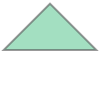

In [73]:
sp.polygonize(lines)